In [175]:
import pandas as pd

In [177]:
df_small = pd.read_csv('data/small.csv')
df_small

,state,county,repub_percent_08,repub_percent_12
0,Texas,Red River,68.507522,69.944817
1,Texas,Walker,60.707197,64.971903
2,Kentucky,Powell,57.059533,61.727293
3,Texas,Schleicher,74.386503,77.384464
4,West Virginia,Morgan,60.857614,64.068711


In [179]:
df_small['diff'] = df_small['repub_percent_08'] - df_small['repub_percent_12']
df_small

,state,county,repub_percent_08,repub_percent_12,diff
0,Texas,Red River,68.507522,69.944817,-1.437295
1,Texas,Walker,60.707197,64.971903,-4.264706
2,Kentucky,Powell,57.059533,61.727293,-4.667760
3,Texas,Schleicher,74.386503,77.384464,-2.997961
4,West Virginia,Morgan,60.857614,64.068711,-3.211097


In [181]:
df_small['abs_diff'] = df_small['diff'].abs()
df_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff
0,Texas,Red River,68.507522,69.944817,-1.437295,1.437295
1,Texas,Walker,60.707197,64.971903,-4.264706,4.264706
2,Kentucky,Powell,57.059533,61.727293,-4.667760,4.667760
3,Texas,Schleicher,74.386503,77.384464,-2.997961,2.997961
4,West Virginia,Morgan,60.857614,64.068711,-3.211097,3.211097


In [183]:
from scipy.stats import rankdata

df_small['rank_abs_diff'] = rankdata(df_small['abs_diff'])
df_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,rank_abs_diff
0,Texas,Red River,68.507522,69.944817,-1.437295,1.437295,1.0
1,Texas,Walker,60.707197,64.971903,-4.264706,4.264706,4.0
2,Kentucky,Powell,57.059533,61.727293,-4.667760,4.667760,5.0
3,Texas,Schleicher,74.386503,77.384464,-2.997961,2.997961,2.0
4,West Virginia,Morgan,60.857614,64.068711,-3.211097,3.211097,3.0


In [36]:
# Negatif olan satirlarin hepsini toplucaz
import numpy as np
T_minus = 1 + 4 + 5 + 2 + 3
T_plus = 0
W = np.min([T_minus, T_plus])
W


0

In [47]:
import pingouin as pg

alpha = 0.01
pg.wilcoxon(x=df_small['repub_percent_08'], 
            y=df_small['repub_percent_12'], 
            alternative='less')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,less,0.03125,-1.0,0.72


In [51]:
#Wilcoxon-Mann-Whitney Test 

import pandas as pd

df_stck= pd.read_feather("data/stack_overflow.feather")

In [53]:
age_vs_comp = df_stck[['converted_comp', 'age_first_code_cut']]
age_vs_comp

,converted_comp,age_first_code_cut
0,77556.0,adult
1,74970.0,child
2,594539.0,child
3,2000000.0,adult
4,37816.0,adult
...,...,...
2256,145000.0,child
2257,33972.0,child
2258,97284.0,child
2259,72000.0,child


In [55]:
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', 
                                     values='converted_comp')
age_vs_comp_wide

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN
...,...,...
2256,NaN,145000.0
2257,NaN,33972.0
2258,NaN,97284.0
2259,NaN,72000.0


In [57]:
import pingouin

alpha = 0.01

pingouin.mwu(x=age_vs_comp_wide['child'], 
             y=age_vs_comp_wide['adult'], 
             alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,0.222516,0.611258


In [61]:
# Kruskal, annovanin tam tersi 

alpha = 0.01

pingouin.kruskal(data=df_stck, dv='converted_comp', between='job_sat')

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


# Machine Learning

##### Unsupervied Learning: Elimizdeki verilerde etiket yoksa bunu bu kullanilir. -> Clustering (etiketsiz veriler)
  - Musterileri ortak ozelliklere gore gruplara ayirma (Clustering)
##### Supervised Learning: Elinzideki verilerin etiketleri vardir. -> Classification (etiketli veriler)
  - Etiketli verilere gore tahmin
  - Binary Classification


#### Veriler
- Input Data = Predictor Variable = Indepented Variable  ==== (X)
- Output Variable = Target Variable = Dependet Variable = Response Variable ==== (y)

Elimizdeki veriler => Data Frame, Pandas Series, Numpy Array olmali

##### Data 
###### 1- Train (Model olusturur 
###### 2- Test (Modelin Basarisi Olculur, modelin basarisi olculurken uygun metrikler kullanilir)


In [86]:
# KNN Sezgisi 

In [92]:
#  Using scikit-learn to fit a classifier
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y= df_churn['churn'].values

(X.shape, y.shape)

((3333, 2), (3333,))

In [95]:
model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X,y)

KNeighborsClassifier(n_neighbors=15)

### gormedigi veriler uzerinde test edicem gormedigi verileri olusturuyorum 

In [107]:
# Predicting on unlabeled data
import numpy as np
X_new = np.array([
    [56.8, 17.5],
    [24.4, 24.1],
    [50.1, 10.9]
])
X_new.shape

(3, 2)

In [111]:
# bu verileri modelden tahmin etmesini isteyebilirm 
predictions = model_knn.predict(X_new)
predictions

array([1, 0, 0])

In [113]:
### Model Performansinin Olculmesi 

Siniflandirmada, accuracy bulmamiz lazim.

correct predictions / total predictions

score(Xtest, ytest)

In [118]:
# Train/test split
# Verilerimizi nasil ikiye boluyoruz

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=42, 
                                                   stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8605697151424287

Text(0, 0.5, 'Doğruluk')

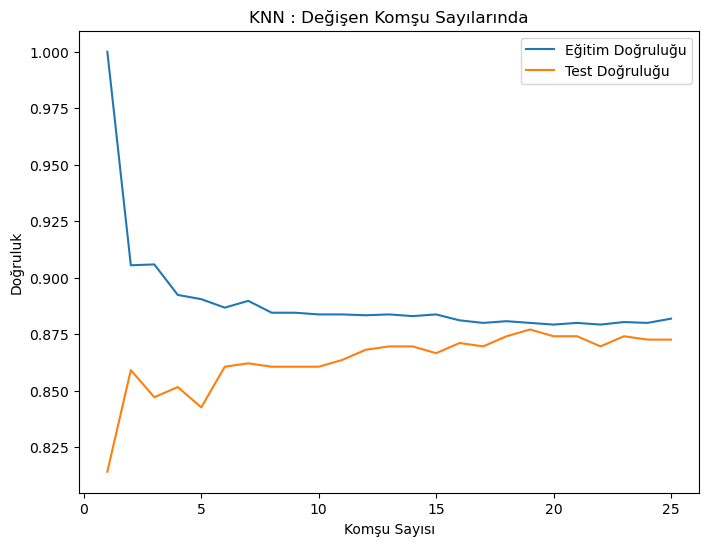

In [120]:
import matplotlib.pyplot as plt

train_accuracies = {}
test_accuracies = {}

neighbours = np.arange(1, 26)

for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn.fit(X_train, y_train)
    train_accuracies[neighbour] = knn.score(X_train, y_train)
    test_accuracies[neighbour] = knn.score(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.title('KNN : Değişen Komşu Sayılarında')
plt.plot(neighbours, train_accuracies.values(), label='Eğitim Doğruluğu')
plt.plot(neighbours, test_accuracies.values(), label='Test Doğruluğu')
plt.legend()
plt.xlabel('Komşu Sayısı')
plt.ylabel('Doğruluk')

In [124]:
## Regression

import pandas as pd

df_diabets = pd.read_csv('data/diabetes_clean.csv')
df_diabets.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [128]:
df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_filtered

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
75,1,0,48,20,0,24.7,0.140,22,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
371,0,118,64,23,89,0.0,1.731,21,0


In [130]:
df_diabets.drop(df_filtered.index, inplace=True)
df_diabets

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [132]:
X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

(type(X), type(y))

(numpy.ndarray, numpy.ndarray)

### Regression
 
#### Simple Lineer Regression: Tek input varsa  y = ax + b
#### multiple Lineer Regression: Birden fazla input varsa  y = ax + bx + cx + ..... + nx

## Basit ve Çoklu Doğrusal Regresyon

Regresyon analizi, bağımlı bir değişkenin (y) bağımsız değişkenlerle (X) olan ilişkisini modellemeyi amaçlar. Bu modelin iki yaygın türü vardır:

1. **Basit Doğrusal Regresyon (Simple Linear Regression)**: Tek bir bağımsız değişken kullanılır.
   - **Formül**: \( y = ax + b \)

2. **Çoklu Doğrusal Regresyon (Multiple Linear Regression)**: Birden fazla bağımsız değişken kullanılır.
   - **Formül**: \( y = ax + bx + cx + \dots + nx \)


In [134]:
X_bmi = X[:, 4]
(X_bmi.shape, y.shape)

((752,), (752,))

In [136]:
X_bmi = X_bmi.reshape(-1, 1)
X_bmi.shape

(752, 1)

Text(0.5, 0, 'Body Mass Index')

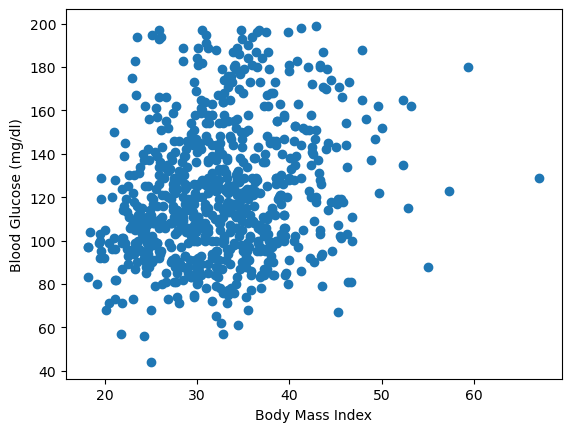

In [138]:
import matplotlib.pyplot as plt

plt.scatter(X_bmi,y)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')

Text(0.5, 0, 'Body Mass Index')

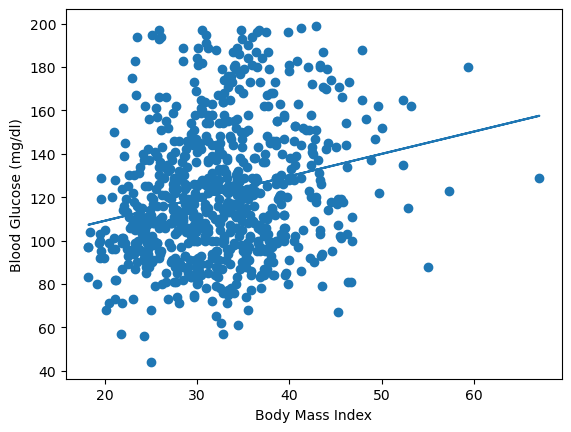

In [140]:
from sklearn.linear_model import LinearRegression

model_reg = LinearRegression()
model_reg.fit(X_bmi, y)

predictions = model_reg.predict(X_bmi)

plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')

y = ax + b 

a = slope
b = intercept

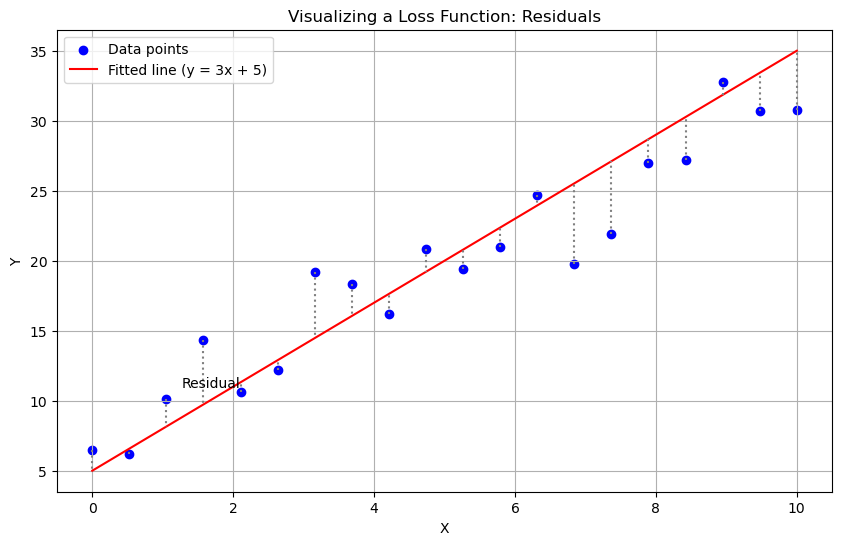

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the scatter plot
np.random.seed(42)
X = np.linspace(0, 10, 20)
Y = 3 * X + 5 + np.random.normal(0, 3, size=len(X))

# Fit a line (y = mx + c) manually
m = 3  # slope
c = 5  # intercept
Y_fit = m * X + c

# Calculate residuals (vertical distances between points and the line)
residuals = Y - Y_fit

# Plot the scatter plot and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_fit, color='red', label='Fitted line (y = 3x + 5)')

# Add vertical lines to represent residuals
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y[i], Y_fit[i]], color='gray', linestyle='dotted')
    if i == 4:  # Add a label to one residual line
        plt.text(X[i], (Y[i] + Y_fit[i]) / 2, 'Residual', color='black', fontsize=10, ha='right')

# Customize the plot
plt.title('Visualizing a Loss Function: Residuals')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd

df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)


X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values


X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, 
                                                   random_state=42)


model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

y_pred = model_reg.predict(X_test)

#Diyabet veri kümesindeki tüm özellikleri kullanarak kan şekeri seviyelerini tahmin etmek için doğrusal regresyon gerçekleştirelim. 
#LinearRegression'ı sklearn-dot-linear_model'den içe aktarıyoruz. Ardından verileri eğitim ve test kümelerine ayırıyoruz, modeli 
#örneklendiriyoruz, eğitim kümesine yerleştiriyoruz ve test kümesinde tahmin ediyoruz. 
#Scikit-learn'deki doğrusal regresyonun kaputun altında OLS gerçekleştirdiğini unutmayın. 


In [169]:
model_reg.score(X_test, y_test)

0.3282802627263198

In [171]:
model_reg.coef_

array([-0.32654116,  0.14686555, -0.27590315,  0.08606826,  0.36160446,
        1.8382773 ,  0.42185562, 25.08247323])

In [173]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, y_pred)

25.695203763480208

## HAFTA 14

In [3]:
#Cross-validation

In [5]:
# k kumeye bolersiniz 

In [7]:
import pandas as pd

In [11]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)

X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

kf = KFold(n_splits=6, shuffle=True, random_state=42)
model_reg = LinearRegression()

cv_results = cross_val_score(model_reg, X, y, cv=kf)

In [13]:
# Evaluting cross-validation performance

cv_results

array([0.31239631, 0.39992274, 0.38698031, 0.19731639, 0.32317527,
       0.3320924 ])

In [15]:
import numpy as np
(np.mean(cv_results), np.std(cv_results))

(0.32531390402925003, 0.06579003824551613)

In [17]:
np.quantile(cv_results, [0.025, 0.975])

array([0.21170138, 0.39830494])

#Regularized Reggession

asiri ogrenme ve overfittinden kacinmak icin kullanilan yapidiri

In [21]:
#  Alfa arttıkça performansın kötüleştiğini görüyoruz. 

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)

X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, 
                                                   random_state=42)

scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))

scores

[0.32825526615552425,
 0.3280240795994781,
 0.3252049078298792,
 0.28836032637802334,
 0.20299309688977707]

In [23]:
# Lasso Regression: Etkin parametre secilirken kullanilir

In [25]:
#  Alfa 20'nin üzerine çıktıkça performans önemli ölçüde düşer! 

from sklearn.linear_model import Lasso

scores = []
for alpha in [0.1, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))

scores

[0.3284857694292622,
 0.3166121180165745,
 0.17121386697851626,
 0.156847521532139,
 0.11477890284329806]

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'pregnancies'),
  Text(1, 0, 'diastolic'),
  Text(2, 0, 'triceps'),
  Text(3, 0, 'insulin'),
  Text(4, 0, 'bmi'),
  Text(5, 0, 'dpf'),
  Text(6, 0, 'age'),
  Text(7, 0, 'diabetes')])

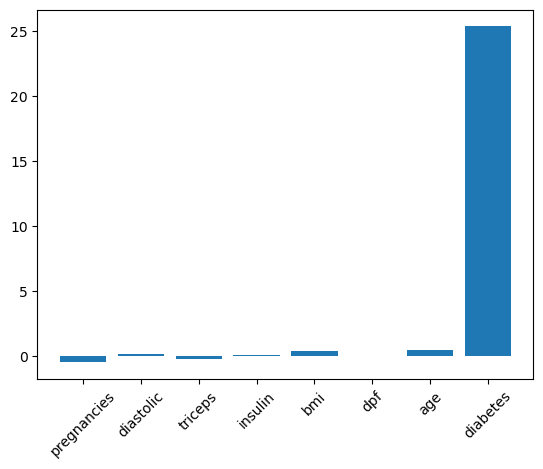

In [27]:
import matplotlib.pyplot as plt

df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)

X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

names = df_diabets.drop('glucose', axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.bar(names, lasso_coef)
plt.xticks(rotation=45)

In [29]:
# Classifications Metrics -> accuracy kullanilir

In [31]:
# Confusion matrix in scikit-learn

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y= df_churn['churn'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[548,  18],
       [ 69,  32]])

<Axes: >

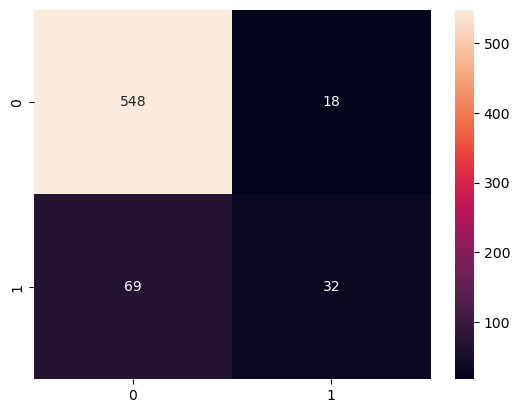

In [33]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       566
           1       0.64      0.32      0.42       101

    accuracy                           0.87       667
   macro avg       0.76      0.64      0.68       667
weighted avg       0.85      0.87      0.85       667



In [37]:
# Logistic Regression: sinfilandirmak icin kullanilan model 

In [41]:
# Confusion matrix in scikit-learn

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y= df_churn['churn'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

model_log = LogisticRegression()
model_log.fit(X_train, y_train)

y_predict = model_log.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
y_pred_probs = model_log.predict_proba(X_test)
y_pred_probs

array([[0.82892316, 0.17107684],
       [0.92986818, 0.07013182],
       [0.98204431, 0.01795569],
       ...,
       [0.91093968, 0.08906032],
       [0.92723286, 0.07276714],
       [0.9081191 , 0.0918809 ]])

In [87]:
y_pred_probs = y_pred_probs[:,1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

THE ROC Curver

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

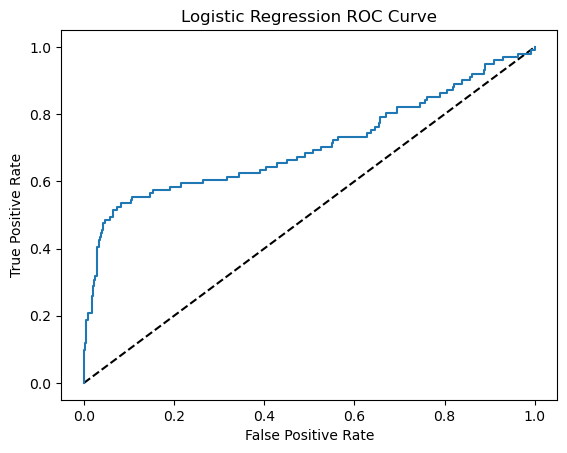

In [85]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

# Bu grafiğe dayanarak modelin performansı nasıl ölçülebilir?

In [61]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_probs)

0.7049469964664311

In [91]:
# Grid Search Cross Validation 

In [93]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import numpy as np 

df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)

X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'alpha': np.arange(0.0001, 1, 10),
    'solver':['sag', 'lsqr']
}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)

(ridge_cv.best_params_, ridge_cv.best_score_)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


({'alpha': 0.0001, 'solver': 'lsqr'}, 0.3404176885506861)

In [95]:
from sklearn.model_selection import RandomizedSearchCV

# İsteğe bağlı olarak, test edilen hiperparametre değerlerinin sayısını belirleyen 
# n_iter bağımsız değişkenini ayarlanabilir. 
# Böylece n_iter iki olarak ayarlandığında 
# beş katlı çapraz doğrulama 10 fit() gerçekleştirir. 


ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)

(ridge_cv.best_params_, ridge_cv.best_score_)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


({'solver': 'lsqr', 'alpha': 0.0001}, 0.3404176885506861)

In [97]:
# Preprocessing Data

In [99]:
import pandas as pd

df_music = pd.read_csv('data/music_genre.csv')
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44996 entries, 0 to 44995
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       44996 non-null  int64  
 1   popularity        44996 non-null  int64  
 2   acousticness      44996 non-null  float64
 3   danceability      44996 non-null  float64
 4   duration_ms       44996 non-null  int64  
 5   energy            44996 non-null  float64
 6   instrumentalness  44996 non-null  float64
 7   liveness          44996 non-null  float64
 8   loudness          44996 non-null  float64
 9   speechiness       44996 non-null  float64
 10  tempo             44996 non-null  float64
 11  valence           44996 non-null  float64
 12  music_genre       44996 non-null  object 
dtypes: float64(9), int64(3), object(1)
memory usage: 4.5+ MB


<Axes: xlabel='music_genre', ylabel='popularity'>

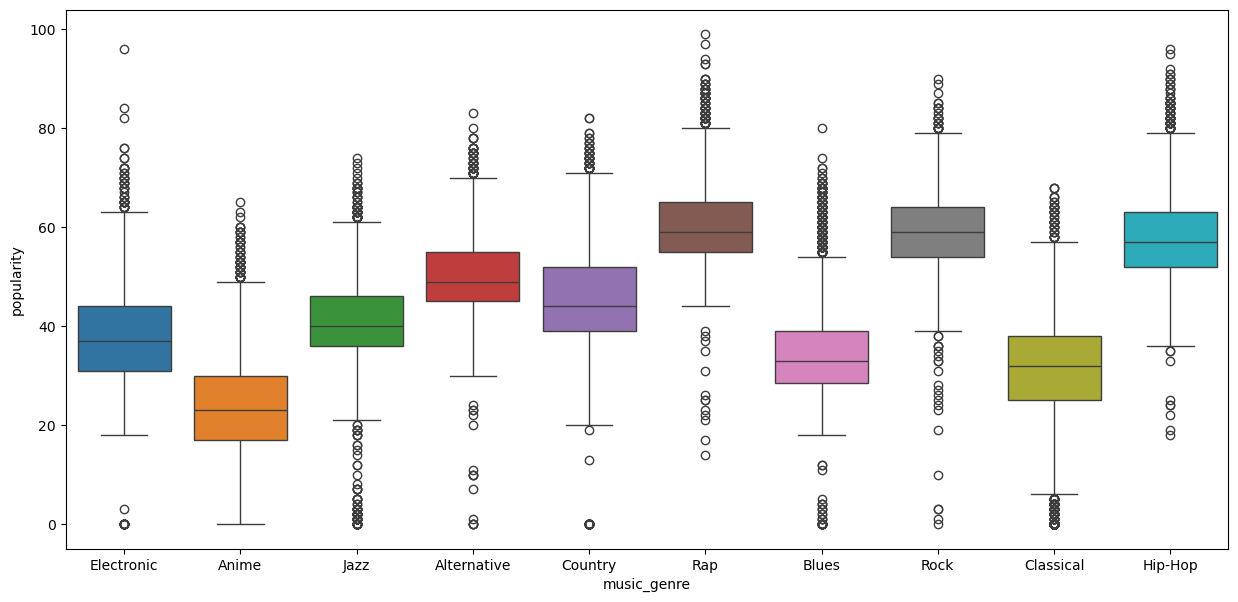

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.boxplot(data=df_music, x='music_genre', y='popularity', hue='music_genre')

In [107]:
music_dummies = pd.get_dummies(df_music['music_genre'], drop_first=True, dtype='int')
music_dummies.head()

,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [109]:
music_dummies = pd.concat([df_music, music_dummies], axis=1)
music_dummies

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,music_genre,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,32894,27,0.00468,0.652,-1,0.941,0.79200,0.115,-5.201,0.0748,...,Electronic,0,0,0,0,1,0,0,0,0
1,46652,31,0.01270,0.622,218293,0.890,0.95000,0.124,-7.043,0.0300,...,Electronic,0,0,0,0,1,0,0,0,0
2,30097,28,0.00306,0.620,215613,0.755,0.01180,0.534,-4.617,0.0345,...,Electronic,0,0,0,0,1,0,0,0,0
3,62177,34,0.02540,0.774,166875,0.700,0.00253,0.157,-4.498,0.2390,...,Electronic,0,0,0,0,1,0,0,0,0
4,24907,32,0.00465,0.638,222369,0.587,0.90900,0.157,-6.266,0.0413,...,Electronic,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,58878,59,0.03340,0.913,-1,0.574,0.00000,0.119,-7.022,0.2980,...,Hip-Hop,0,0,0,0,0,1,0,0,0
44992,43557,72,0.15700,0.709,251860,0.362,0.00000,0.109,-9.814,0.0550,...,Hip-Hop,0,0,0,0,0,1,0,0,0
44993,39767,51,0.00597,0.693,189483,0.763,0.00000,0.143,-5.443,0.1460,...,Hip-Hop,0,0,0,0,0,1,0,0,0
44994,57944,65,0.08310,0.782,262773,0.472,0.00000,0.106,-5.016,0.0441,...,Hip-Hop,0,0,0,0,0,1,0,0,0


In [111]:
music_dummies = music_dummies.drop(['music_genre', 'instance_id'], axis=1)
music_dummies

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,27,0.00468,0.652,-1,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,0,0,0,0,1,0,0,0,0
1,31,0.01270,0.622,218293,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531,0,0,0,0,1,0,0,0,0
2,28,0.00306,0.620,215613,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,0,0,0,0,1,0,0,0,0
3,34,0.02540,0.774,166875,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,0,0,0,0,1,0,0,0,0
4,32,0.00465,0.638,222369,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,59,0.03340,0.913,-1,0.574,0.00000,0.119,-7.022,0.2980,98.028,0.330,0,0,0,0,0,1,0,0,0
44992,72,0.15700,0.709,251860,0.362,0.00000,0.109,-9.814,0.0550,122.043,0.113,0,0,0,0,0,1,0,0,0
44993,51,0.00597,0.693,189483,0.763,0.00000,0.143,-5.443,0.1460,131.079,0.395,0,0,0,0,0,1,0,0,0
44994,65,0.08310,0.782,262773,0.472,0.00000,0.106,-5.016,0.0441,75.886,0.354,0,0,0,0,0,1,0,0,0


In [113]:
# Linear regression with dummy variables

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X = music_dummies.drop('popularity', axis=1).values
y = music_dummies['popularity'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model_reg = LinearRegression()
model_reg_cv = cross_val_score(model_reg, X_train, y_train, cv=kf, 
                               scoring='neg_mean_squared_error')

np.sqrt(-model_reg_cv)

array([9.55195316, 9.35056784, 9.426638  , 9.61559878, 9.60648301])